In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(style='white')

In [7]:
# --- Load Data ---
df = pd.read_csv(r"C:\Users\VICTUS\Downloads\WA_Fn-UseC_-Telco-Customer-Churn - WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# --- Quick Overview ---
print(df.shape)
df.info()
df.describe().T
df.isnull().sum()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# --- Data Cleaning ---
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [15]:
# --- Verify Duplicates ---
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


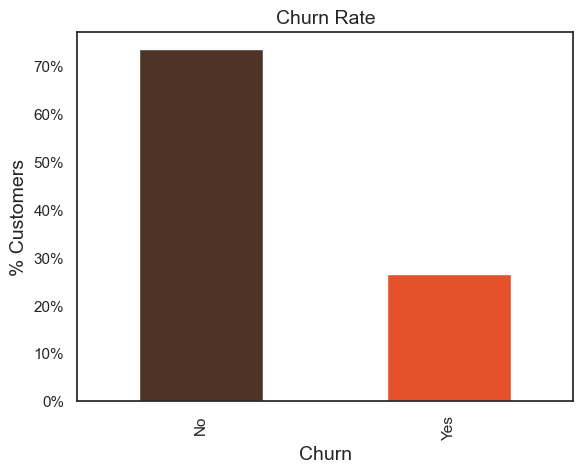

In [17]:
# --- Churn Distribution ---
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked=True, color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)
plt.show()

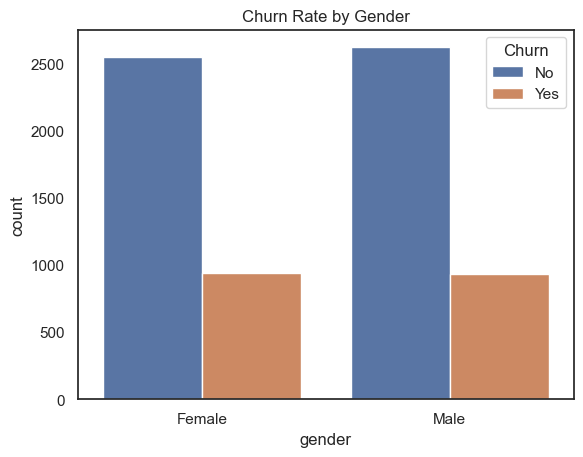

In [19]:
# --- Gender vs Churn ---
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.show()

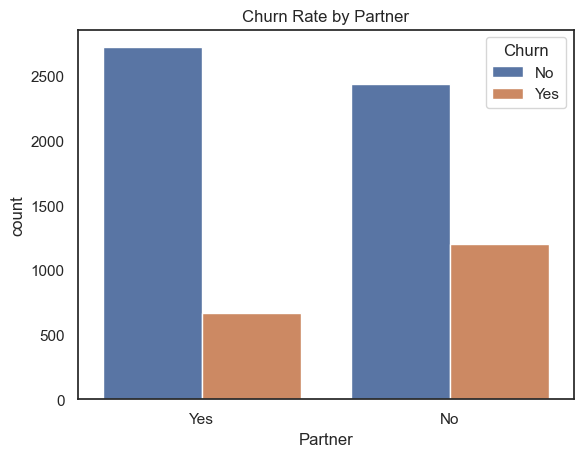

In [21]:
# --- Partner vs Churn ---
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn Rate by Partner')
plt.show()

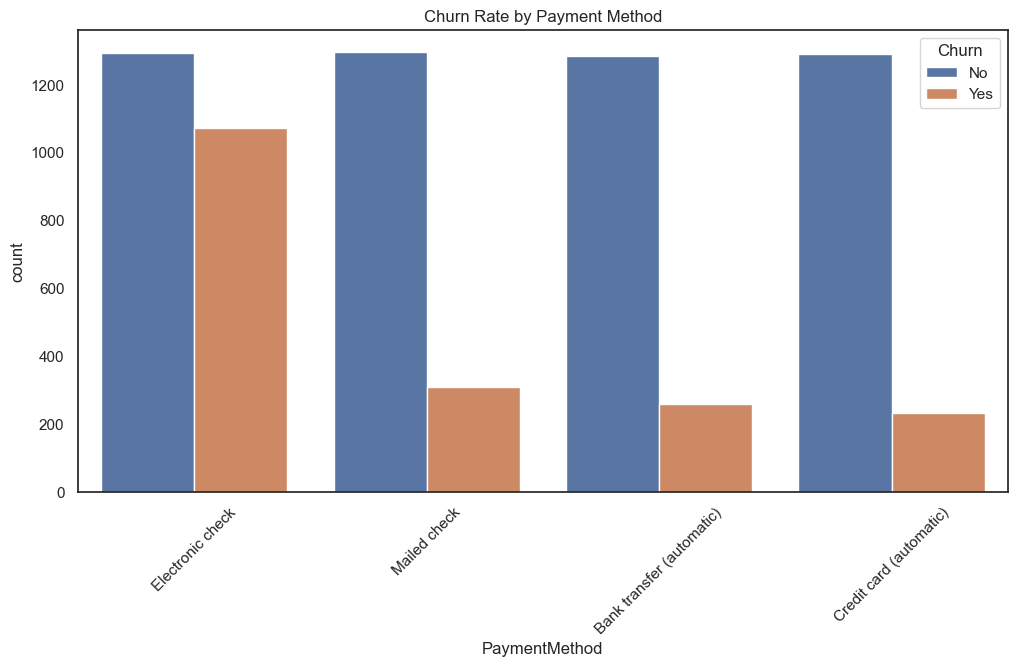

In [23]:
# --- Payment Method vs Churn ---
plt.figure(figsize=(12,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()

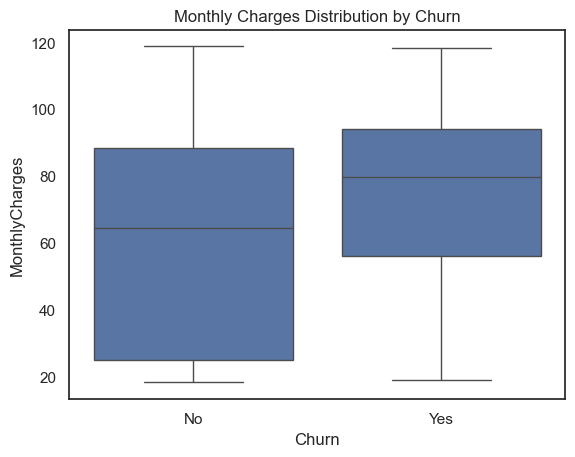

In [25]:
# --- Monthly Charges vs Churn ---
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

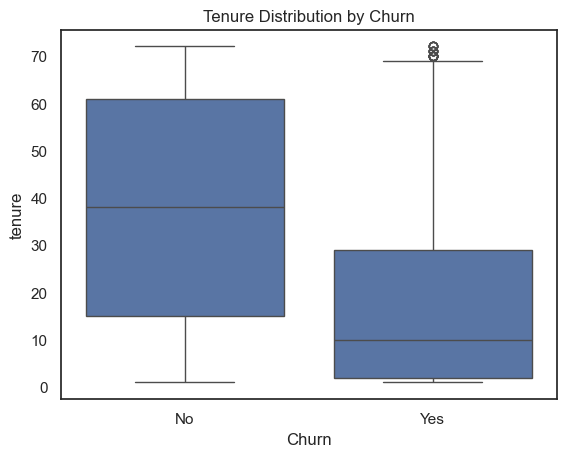

In [27]:
# --- Tenure vs Churn ---
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn')
plt.show()

In [29]:
# --- Correlation Matrix ---
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

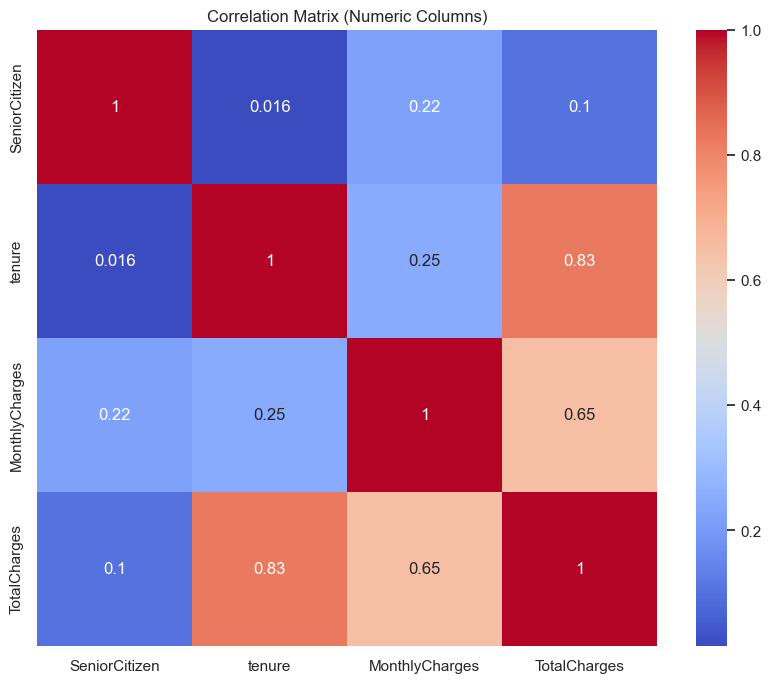

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()